In [1]:
# Import Data Manipulation Library
import pandas as pd
import numpy as np
# Data visualization library
import seaborn as sns
import matplotlib.pyplot as plt
#import data filter warning library
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data using URL from GITHUB
url = 'https://raw.githubusercontent.com/vrushali253/SUPPLYCHAINY/refs/heads/main/SCM%20-%20SCM.csv'
df = pd.read_csv(url)
df.sample(frac = 1) # data shuffle

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
15109,WH_115109,EID_65109,Rural,Mid,South,Zone 2,6,0,2,4806,...,0,141,21.0,1999.0,34,0,A,5,12,44073
18848,WH_118848,EID_68848,Rural,Large,West,Zone 6,6,2,2,4732,...,0,119,26.0,NaN,13,0,C,5,6,16103
15092,WH_115092,EID_65092,Rural,Large,North,Zone 6,6,2,2,4471,...,1,170,38.0,NaN,15,0,B+,2,23,17055
15865,WH_115865,EID_65865,Rural,Mid,North,Zone 4,3,0,3,4298,...,1,179,34.0,NaN,14,0,C,2,26,17134
15549,WH_115549,EID_65549,Rural,Large,West,Zone 6,5,0,5,3650,...,1,149,26.0,1998.0,31,0,C,5,23,40127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,WH_107485,EID_57485,Rural,Mid,South,Zone 2,8,1,2,5451,...,1,136,28.0,NaN,0,0,NaN,0,32,3109
11801,WH_111801,EID_61801,Rural,Mid,West,Zone 3,8,0,3,4615,...,1,205,22.0,2002.0,26,0,A,3,19,35062
3546,WH_103546,EID_53546,Rural,Large,North,Zone 6,6,4,4,3898,...,1,93,43.0,NaN,13,0,B,2,28,16111
18102,WH_118102,EID_68102,Urban,Large,North,Zone 6,8,1,3,4455,...,0,174,23.0,2007.0,33,1,C,4,6,43143


In [3]:
# Checking dataset  information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [4]:
df.describe() # data is non normally distributed since mean not equal to median

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,21273.000000,11605.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000
mean,4.097020,0.777201,3.103928,4983.115711,42.386998,0.098691,0.054492,0.656072,163.613725,28.936398,2009.401206,17.116659,0.304199,3.487765,18.767765,22086.780813
std,2.606289,1.201747,1.142886,1050.634225,16.057730,0.298253,0.226991,0.475028,62.660709,7.843431,7.527223,9.174193,0.460078,1.691661,8.644778,11626.192340
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4309.250000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12151.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,20.000000,22099.000000
75%,6.000000,1.000000,4.000000,5499.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30102.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


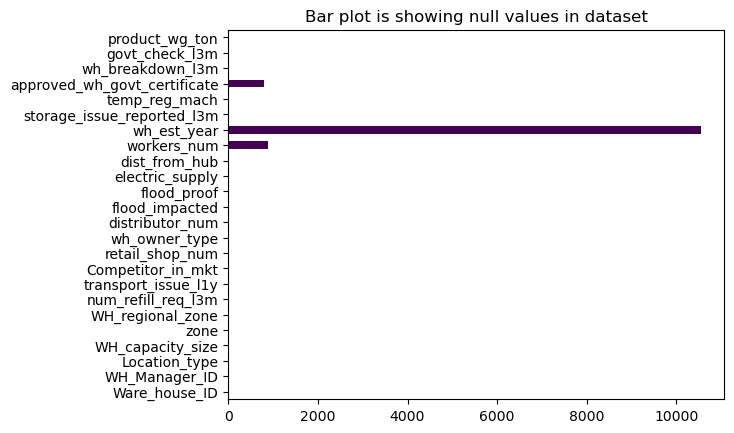

In [7]:
# checking null values in dataset
df.isnull().sum().plot(kind = 'barh',cmap = 'viridis')
plt.title('Bar plot is showing null values in dataset')
plt.show()

In [9]:
#calculate missing value percentage
(df['approved_wh_govt_certificate'].isnull().sum() / len(df['approved_wh_govt_certificate'])) * 100

3.6343115124153504

In [10]:
# calculate missing value percentage of wh est year
(df['wh_est_year'].isnull().sum() / len(df['wh_est_year'])) * 100

47.60722347629797

In [11]:
df['wh_est_year'].value_counts().head(10)

wh_est_year
2000.0    495
2002.0    479
2006.0    475
2014.0    474
2007.0    465
2004.0    458
2016.0    454
2001.0    450
1998.0    449
2018.0    448
Name: count, dtype: int64

In [12]:
df['wh_est_year'].quantile(0.5),df['wh_est_year'].quantile(0.25)

(2009.0, 2003.0)

In [13]:
df['wh_est_year'].median()

2009.0

In [14]:
df['wh_est_year'].mean()

2009.4012063765617

In [15]:
# imputing the missing value column
df['wh_est_year'].fillna(2009, inplace = True)

In [17]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode(),inplace = True)